# **PERDIDOS EN EL ESPACIO**

Este proyecto consiste en localizar el planeta en el que se encuentra la nave.

## Importaciones necesarias

In [88]:
# Importación de las librerias
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
print("Setup complete")

Setup complete


## Primera toma de contacto con los planetas

### Creación de los planetas

Los planetas tienen características similares, mismas variables, pero con distintos datos. Por ello, sería óptimo la creación de clases poniendo como variable la gravedad y nombre de cada uno de ellos.

In [89]:
class Planeta:
    def __init__(self, nombre, g): #g: gravedad
        self.nombre = nombre
        self.g = g

planetas = {'Tierra': 9.8 , 'Marte': 3.7, 'Jupiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0} # Posibles planetas
planetas_simulacion = [] # Planetas que se van a usar en la simulación

for i in range(len(planetas)):
    planetas[i] = Planeta(list(planetas.keys())[i], list(planetas.values())[i])
    planetas_simulacion.append(planetas[i])
print("Planetas cargados")

Planetas cargados


Con los planetas ya generados se pasaría a la fase de la experimentación y descartar algunos planetas mediante los ejercicios 1 y 2. Aunque primero definimos las operaciones que se utilizarán para el cálculo del error y la gravedad.

### Cálculos

In [104]:
# Operación de la simulación
def simulacion(longitud, tiempo):
    # CALCULO DE LA GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # CALCULO DEL ERROR
    L_error = 0.01 # VALOR YA DADO
    t_error = 0.01 # VALOR YA DADO
    dg_dL = 2 / tiempo**2 #Derivada parcial g respecto l
    dg_dt = -4 * longitud / tiempo**3 #Derivada parcial g respecto t
    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2) # Error de la gravedad
    return g_calculado, g_error

def planetas_esperados(g_calculado, g_error):
    # PLANETAS MAS PROBABLES
    planetas_probables = []
    for i in range(len(planetas_simulacion)):
        if g_calculado - g_error < planetas_simulacion[i].g < g_calculado + g_error:
            planetas_probables.append(planetas[i])
    return planetas_probables

Establecidad las operaciones. Se pasa a la fase de descarte de planetas.

In [105]:
experimento_a = simulacion(1, 0.46)
experimento_a = planetas_esperados(experimento_a[0], experimento_a[1])
experimento_b = simulacion(2, 0.66)
experimento_b = planetas_esperados(experimento_b[0], experimento_b[1])
if experimento_a == experimento_b:
    print("El planeta en el que se encuentra la nave se trata de ", experimento_a[0].nombre())
else:
    planetas_probables = []
    for i in range(len(experimento_a)):
        planetas_probables.append(experimento_a[i])
    for i in range(len(experimento_b)):
        planetas_probables.append(experimento_b[i])
    print("El planeta se puede encontrar en alguno de los siguientes planetas: ")
    for i in range(len(planetas_probables)):
        print('  -', planetas_probables[i].nombre)

El planeta se puede encontrar en alguno de los siguientes planetas: 
  - Tierra
  - Saturno


A continuación la lista se nos ha reducido a 3 posibles planetas por lo tanto comencemos dataset

## Creación del DataSet

TEXTO

### Creacion de distintos instantes de tiempo

In [92]:
df_recta = pd.DataFrame({'longitud': [0.46, 0.66], 'tiempo': [1,2]})
coefficients = np.polyfit(df_recta['tiempo'], df_recta['longitud'], 1) # polyfit(x, y, degree) sirve para calcular los coeficientes de la ecuación de la recta (y = mx + b)
m = coefficients[0]
b = coefficients[1]
fig = px.scatter(df_recta, x='tiempo', y='longitud')
fig.add_trace(px.line(x=df_recta['tiempo'], y=m*df_recta['tiempo'] + b).data[0])
fig.show()

In [93]:
# Generar valores de x equidistantes en el intervalo [0.46, 0.66]
x = np.linspace(0.46, 0.66, 100)

# Calcular los valores correspondientes de y a partir de la ecuación de la recta
y = 5*x - 1.3

# Crear una lista de diccionarios con los valores de x e y
data = []
for i in range(len(x)):
    data.append({'tiempo': x[i], 'longitud': y[i]})


df_recta = pd.DataFrame(data)

In [94]:

df_recta.head()


,tiempo,longitud
0,0.460000,1.000000
1,0.462020,1.010101
2,0.464040,1.020202
3,0.466061,1.030303
4,0.468081,1.040404


In [95]:
df_recta.astype(float)
df_recta.dtypes

tiempo      float64
longitud    float64
dtype: object

### Cálculo de la gravedad

In [96]:
for i in range(len(df_recta)):
    df_recta['g_calculado'] = simulacion(df_recta['longitud'][i], df_recta['tiempo'][i])[0]
    df_recta['g_error'] = simulacion(df_recta['longitud'][i], df_recta['tiempo'][i])[1]

In [97]:
df_recta.head()

,tiempo,longitud,g_calculado,g_error
0,0.460000,1.000000,9.182736,0.282027
1,0.462020,1.010101,9.182736,0.282027
2,0.464040,1.020202,9.182736,0.282027
3,0.466061,1.030303,9.182736,0.282027
4,0.468081,1.040404,9.182736,0.282027


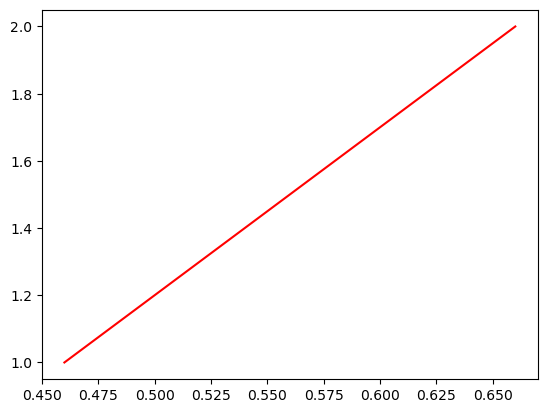

In [107]:

# Graficar los puntos del DataFrame
plt.plot(df_recta['tiempo'], df_recta['longitud'], 'o', label='Datos')

# Ajustar una línea recta a los datos y graficarla
a, b = np.polyfit(df_recta['tiempo'], df_recta['longitud'], 1)
plt.plot(df_recta['tiempo'], a * df_recta['tiempo'] + b, '-', label='Recta de ajuste', color='red')

# Etiquetar los ejes y agregar una leyenda
plt.xlabel('Tiempo')
plt.ylabel('Longitud')
plt.legend()

# Mostrar el gráfico
plt.show()

### Posible planeta

In [98]:
df_recta_1 = df_recta.copy()

In [99]:
for i in range(len(df_recta_1)):
    df_recta_1['planetas'] = planetas_esperados(df_recta_1['g_calculado'][i], df_recta_1['g_error'][i])

ValueError: Length of values (1) does not match length of index (100)

## Conclusión